In [1]:
import pandas as pd
import numpy as np

from Processing.load_dataset import Load_dataset
from Processing.processing import Split, Valid, Submission
from Engineering.enginnering import engin

from Model.lightgbm import LightGBM
from sklearn.metrics import mean_squared_error

In [8]:
train, test = Load_dataset()

# 加工・処理
train_df = engin(train)

# val, train, test
X_train, X_test, y_train, y_test, index = Split(train_df)
X_train, X_valid, y_train, y_valid = Valid(X_train, y_train)

C:\Users\yu886\Anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\yu886\Anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\yu886\Anaconda3\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'evals_result' argument is depr

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011971 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11474
[LightGBM] [Info] Number of data points in the train set: 125401, number of used features: 45
[LightGBM] [Info] Start training from score 59.230542
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[100]	Train's rmse: 20.5499	Test's rmse: 21.4856


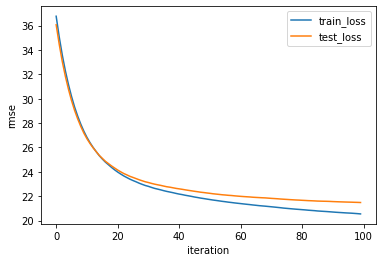

In [9]:
# 学習
Light_GBM = LightGBM(X_train, X_valid, y_train, y_valid, fig=1)

In [10]:
# Test
test_predict = Light_GBM.predict(X_test)
print(np.sqrt(mean_squared_error(test_predict, y_test)))

21.44279646637248


In [11]:
# create
test_df = engin(test)
index = np.array(test_df["id"])
test_df = test_df.drop(columns=["id"])
predict_light_gbm = Light_GBM.predict(data=test_df)

# submit
Submission(index, predict_light_gbm, name='3')